In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2
import tensorflow as tf

In [39]:
path = './Normal videos/Assault002_x264.mp4'

In [40]:
video_file = cv2.VideoCapture(path)
print(video_file)

<VideoCapture 0x7f3c281be610>


In [26]:
if not video_file.isOpened():
    print('Error reading video')

In [ ]:

# Get the frames per second
fps = video_file.get(cv2.CAP_PROP_FPS)

# Print the FPS
print("Frames per second:", fps)

In [ ]:
frames_list = []

In [ ]:
while(video_file.isOpened()):
    #Reading frame-by-frame
    ret, frame = video_file.read()
    
    if not ret:
        print('Error in reading the frame or stream end')
        break
    else:
        frames_list.append(frame)
        
    if cv2.waitKey(1) == ord('q'):
        break


In [ ]:
video_file.release()
cv2.destroyAllWindows()

In [ ]:
print(len(frames_list))

In [ ]:
frame_to_display = frames_list[0]
plt.imshow(cv2.cvtColor(frame_to_display, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
frame_to_display = frames_list[60]
plt.imshow(cv2.cvtColor(frame_to_display, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
first_frame = cv2.cvtColor(frames_list[0], cv2.COLOR_BGR2GRAY )
second_frame = cv2.cvtColor(frames_list[50], cv2.COLOR_BGR2GRAY )
frame_difference = cv2.absdiff(first_frame, second_frame)

In [ ]:
plt.imshow(frame_difference, cmap='gray')
plt.show()

In [ ]:
third_frame = cv2.cvtColor(frames_list[30], cv2.COLOR_BGR2GRAY )
plt.imshow(third_frame, cmap='gray')
plt.show()

In [ ]:
third_frame = cv2.cvtColor(frames_list[60], cv2.COLOR_BGR2GRAY )
plt.imshow(third_frame, cmap='gray')
plt.show()

In [ ]:
another_difference = cv2.absdiff(first_frame, third_frame)

In [ ]:
plt.imshow(another_difference, cmap='gray')
plt.show()

**Using Average Technique**

In [41]:
video_file = cv2.VideoCapture(path)
print(video_file)

<VideoCapture 0x7f3c281becb0>


In [42]:
def convert_to_gray(img):
    converted_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY )
    return converted_gray

In [43]:
frame_sum = None
average_frames = []
frame_counter = 0

while True:
    ret, frame = video_file.read()
    
    #If the end of frames or any error in reading
    if not ret:
        break
        
    #converting to grayscale
    image = convert_to_gray(frame)
    
    #Summing frames for averaging later
    if frame_sum is None:
        frame_sum = image.astype('float64')
    else:
        frame_sum += image.astype('float64')
    
    frame_counter += 1
    
    if frame_counter == 30:
        average_frame = frame_sum / frame_counter
        average_frames.append(average_frame)
        frame_sum = None
        frame_counter = 0
     
video_file.release()
cv2.destroyAllWindows()   
    
    
        

In [44]:
difference_list = []

In [45]:
print(len(average_frames))

84


In [46]:
j = 0

for k in range(len(average_frames)):
    difference = average_frames[j] -  average_frames[k]
    difference_list.append(difference)

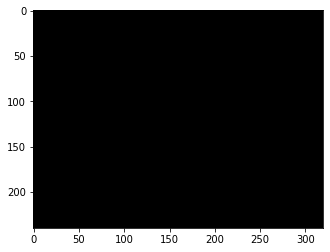

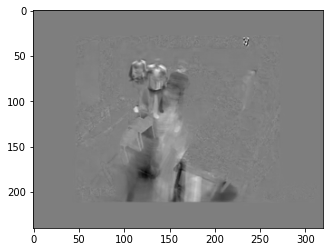

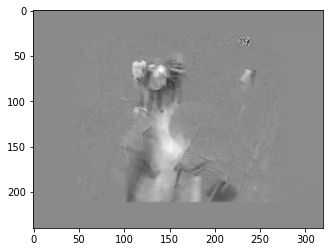

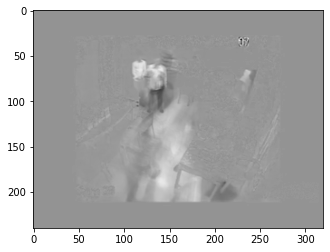

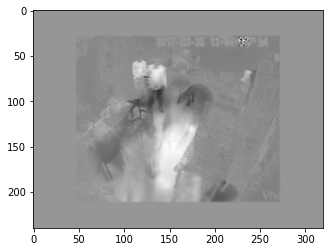

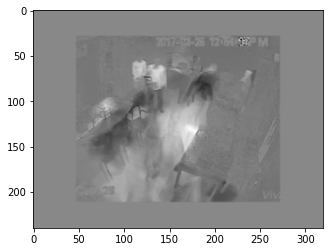

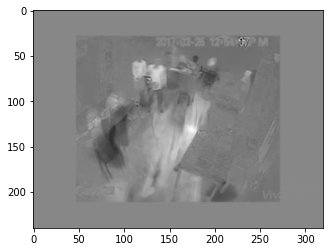

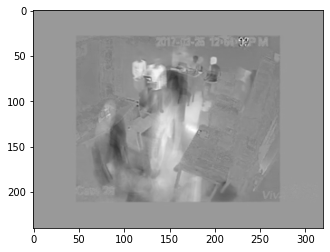

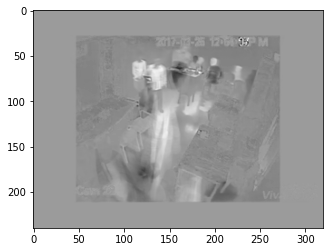

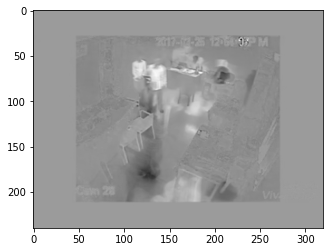

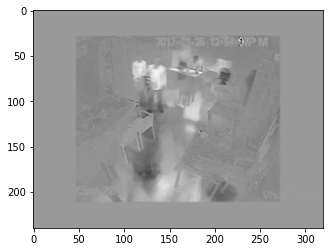

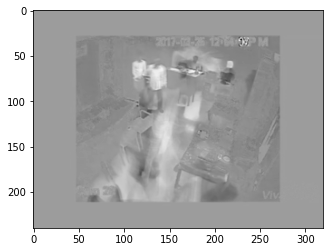

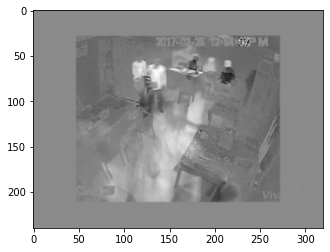

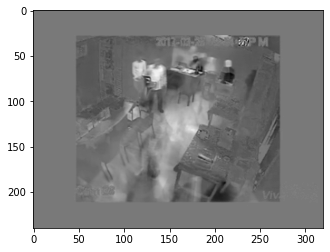

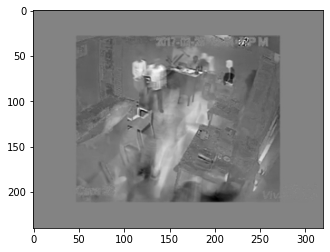

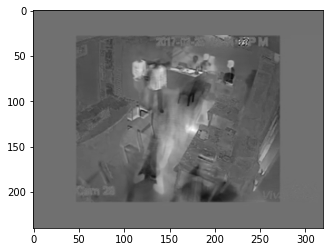

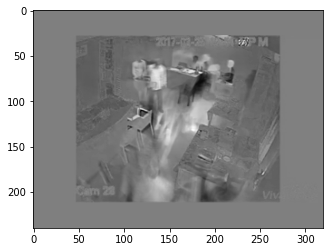

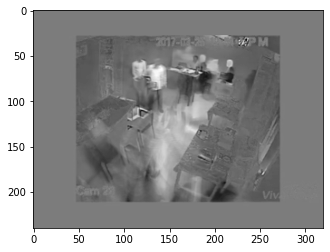

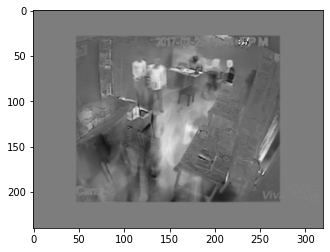

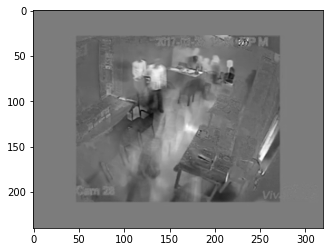

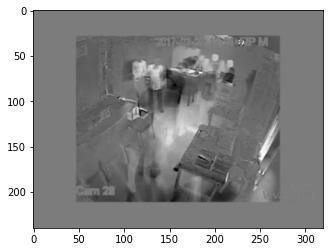

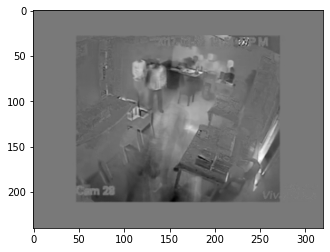

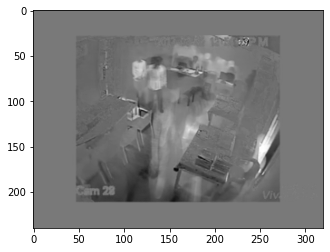

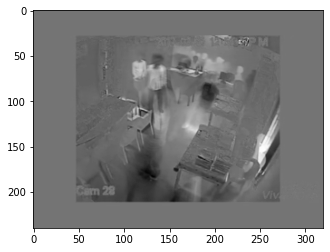

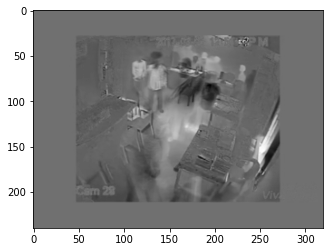

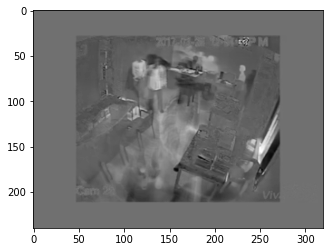

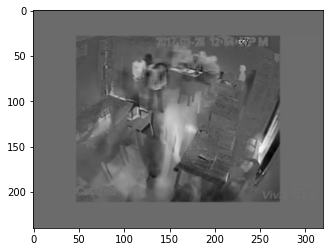

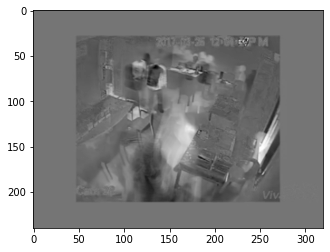

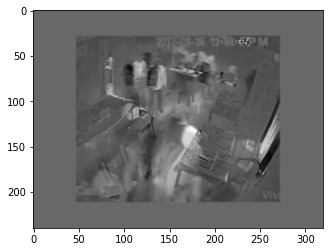

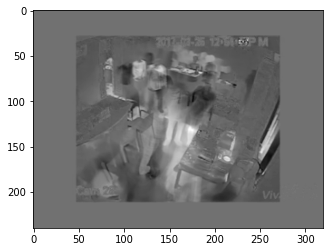

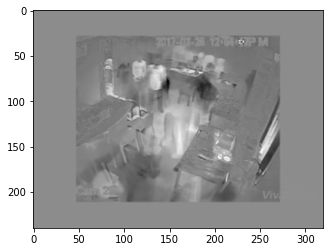

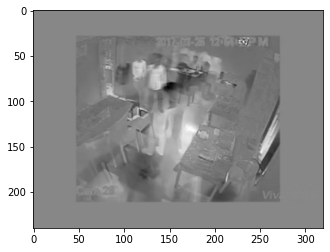

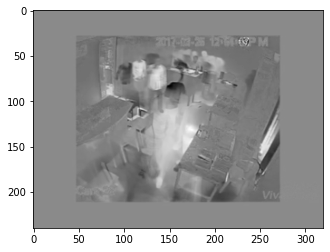

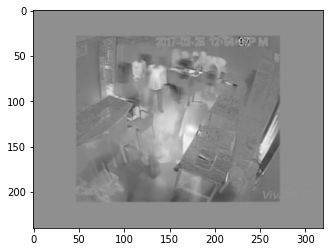

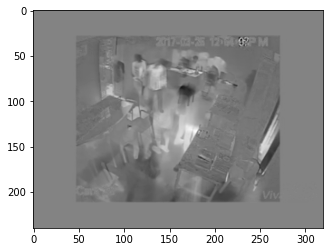

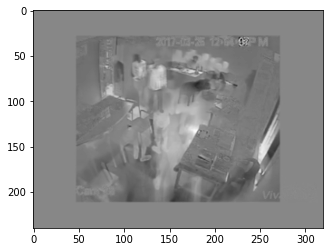

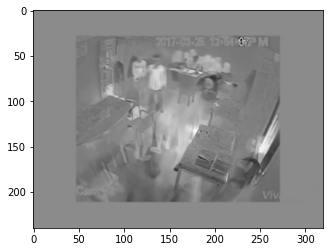

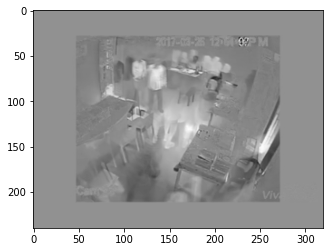

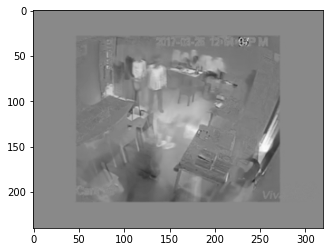

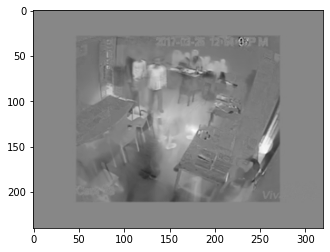

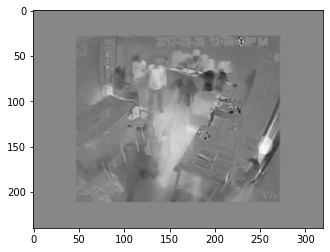

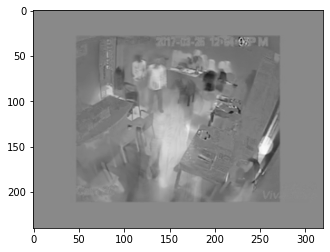

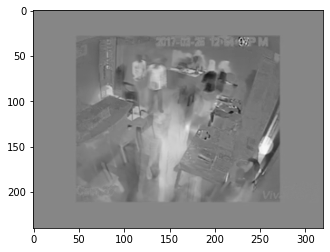

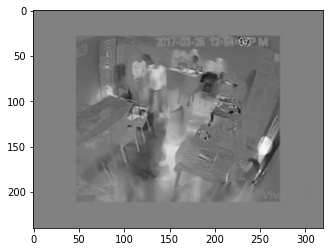

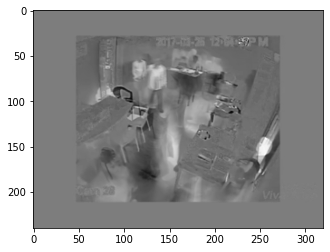

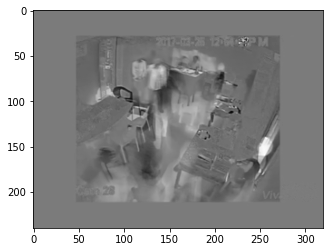

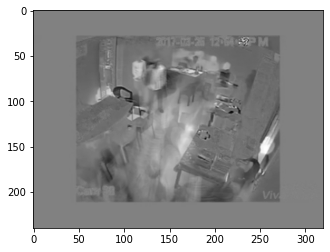

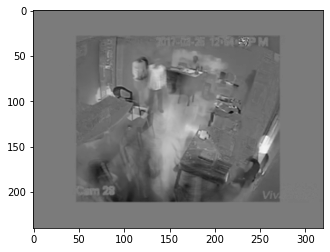

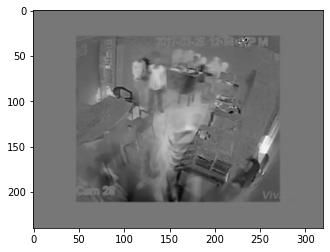

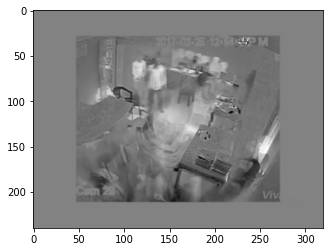

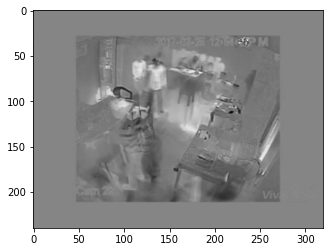

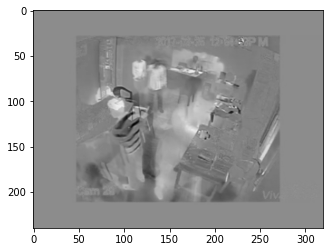

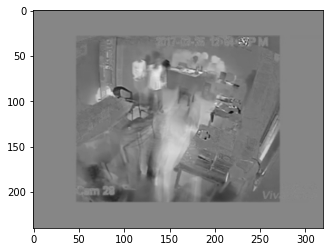

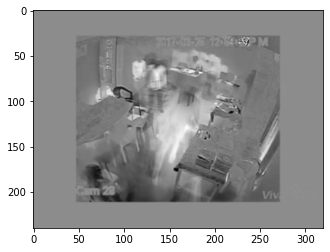

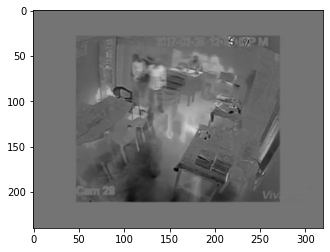

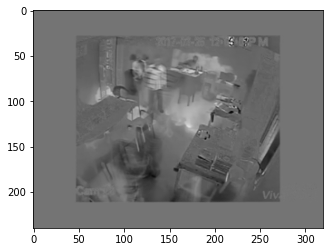

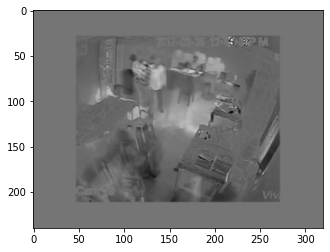

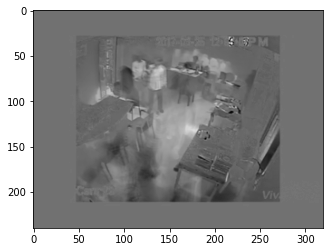

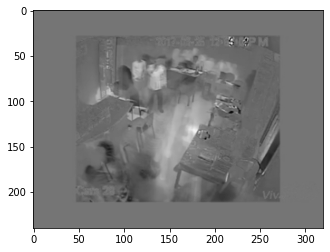

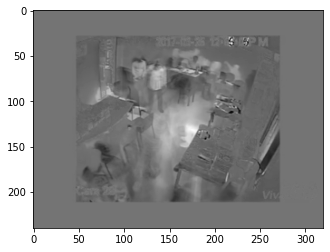

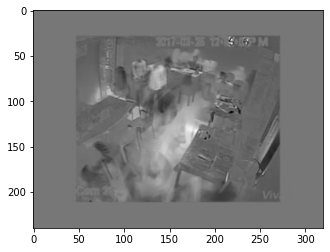

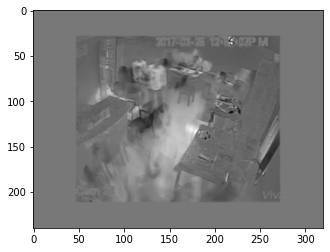

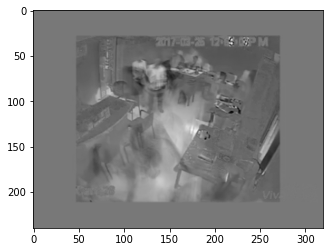

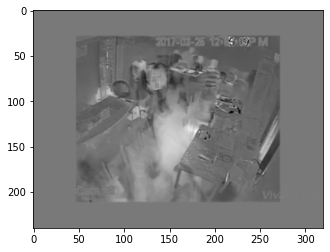

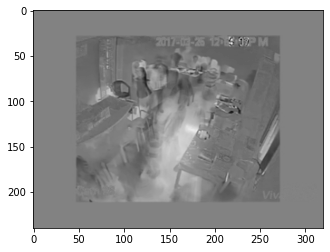

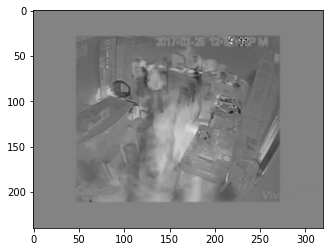

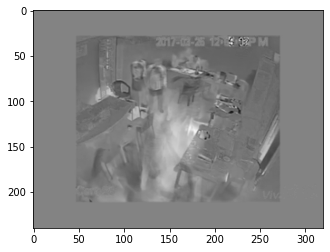

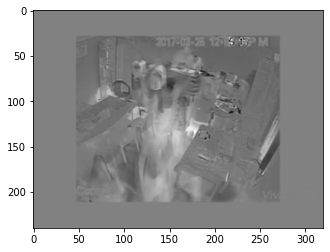

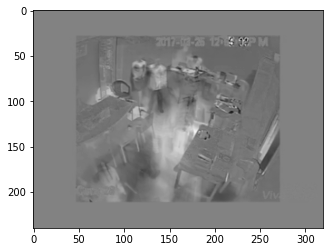

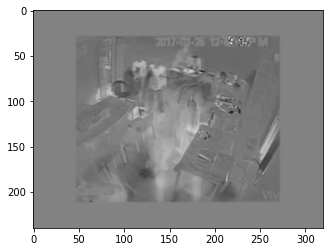

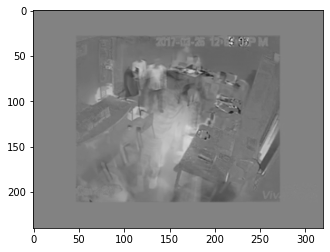

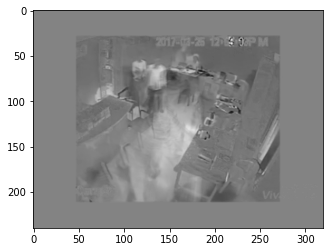

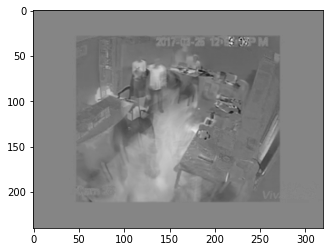

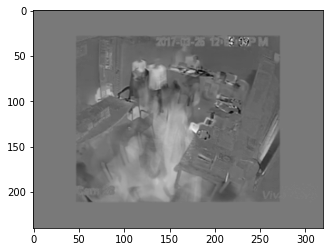

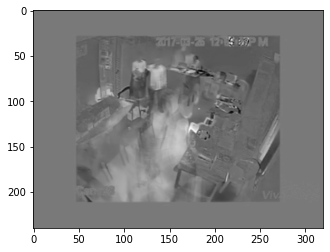

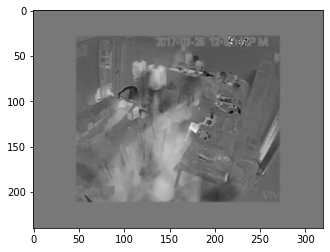

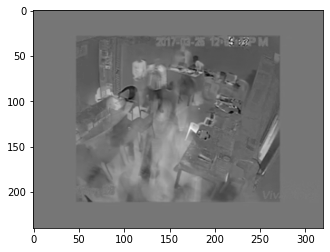

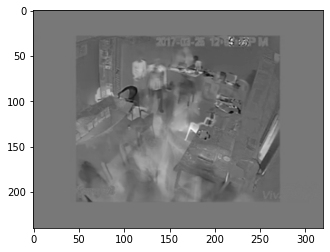

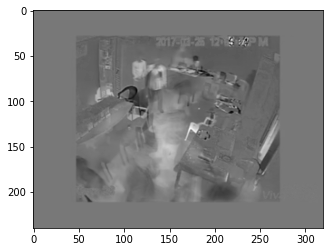

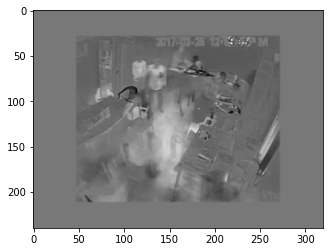

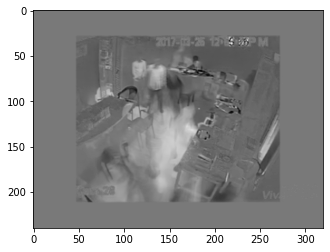

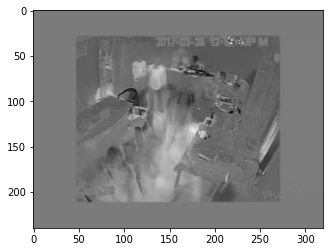

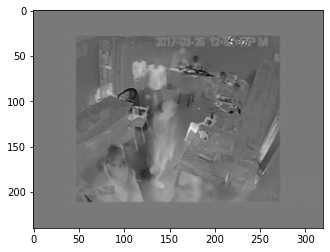

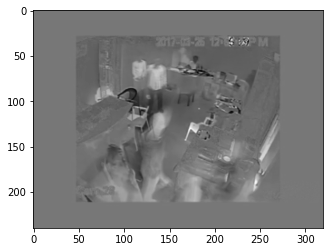

In [47]:
for item in difference_list:
    plt.imshow(item, cmap='gray')
    plt.show()

In [48]:
new_differences_list = []

In [49]:
for i in range(len(average_frames) - 1):
    difference = average_frames[i] -  average_frames[i + 1]
    new_differences_list.append(difference)

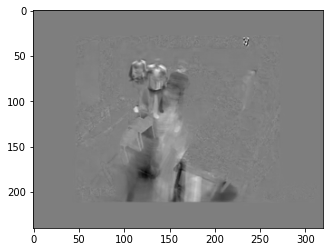

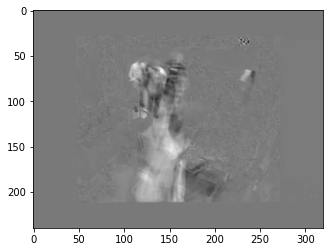

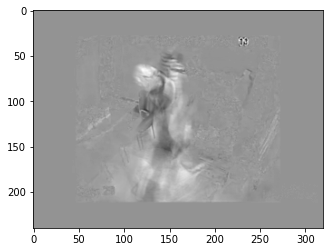

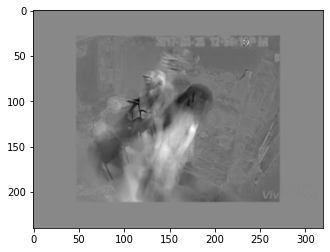

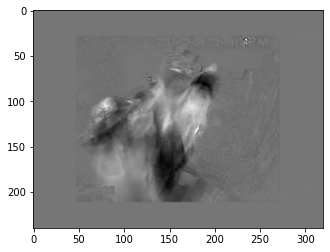

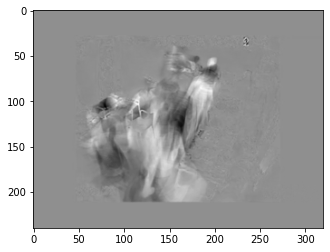

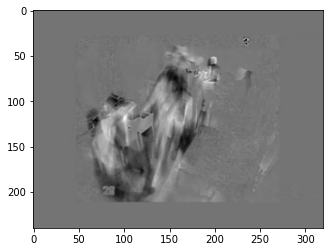

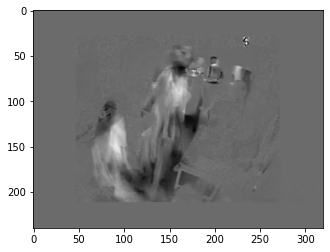

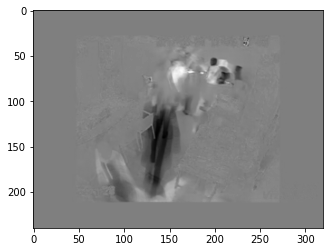

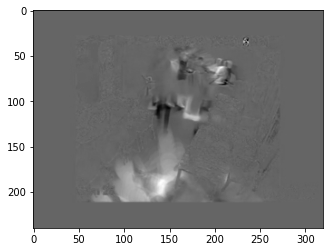

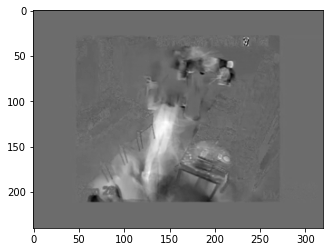

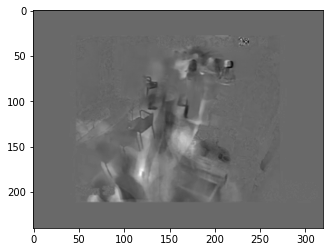

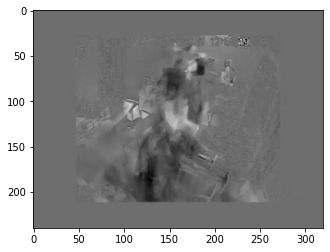

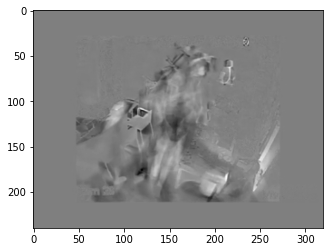

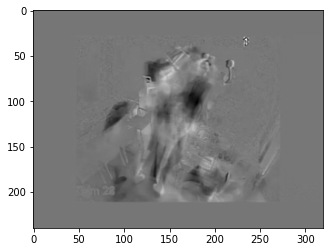

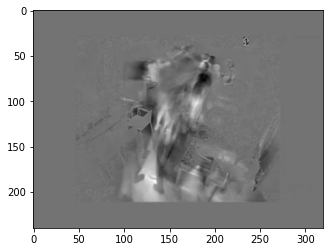

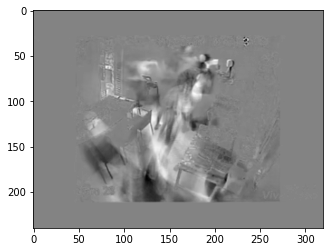

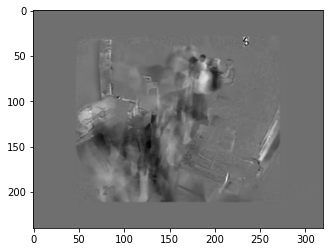

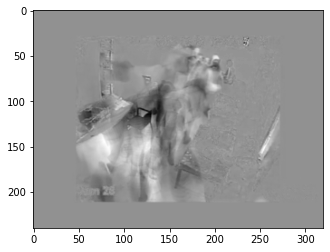

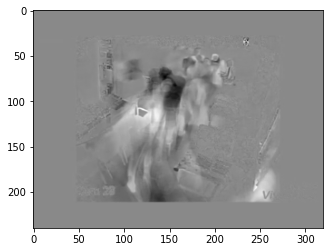

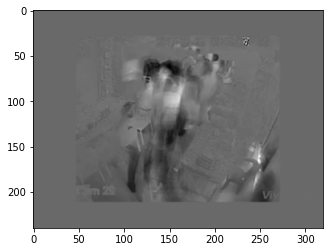

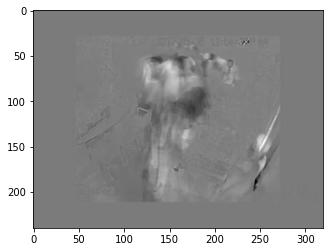

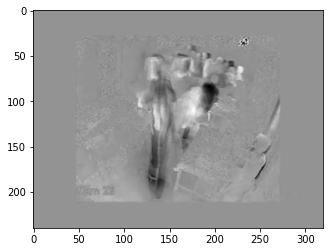

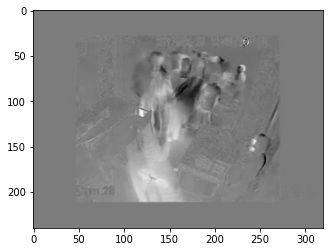

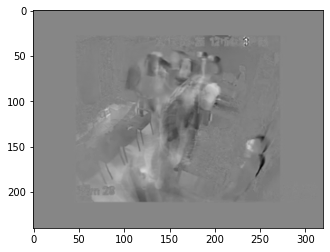

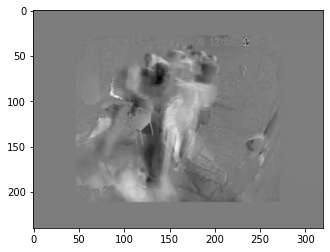

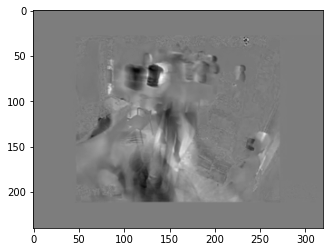

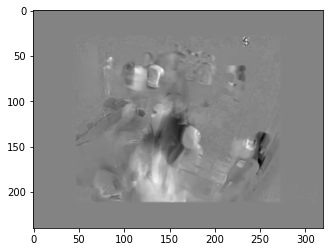

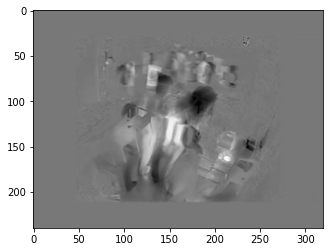

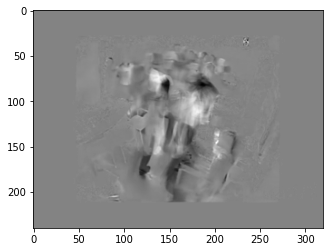

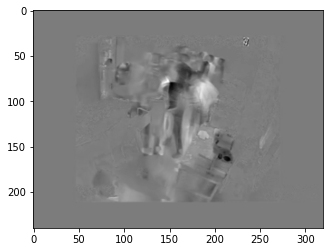

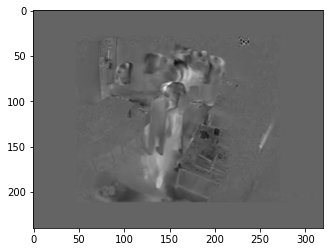

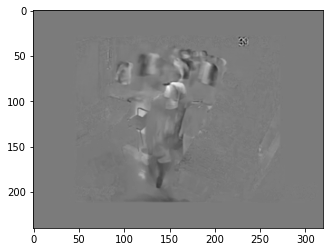

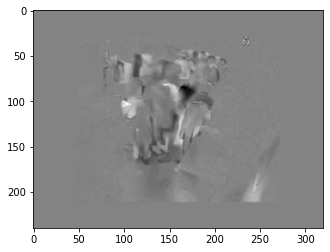

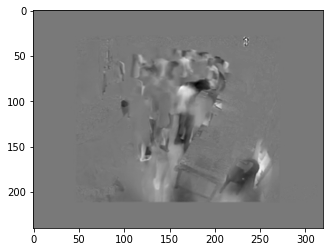

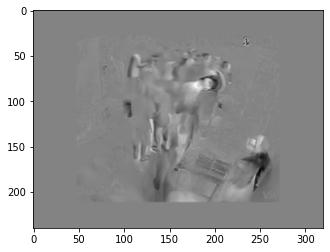

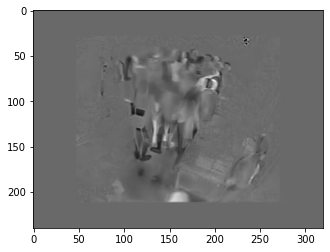

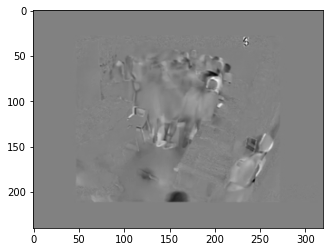

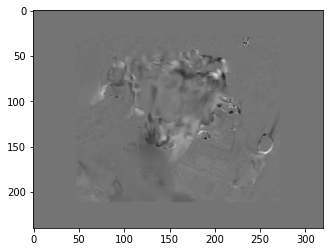

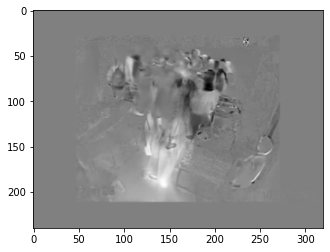

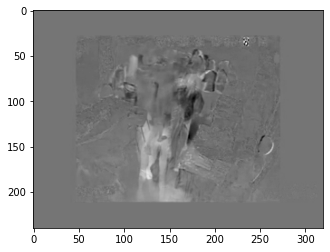

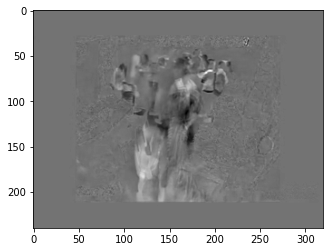

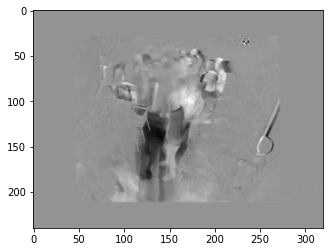

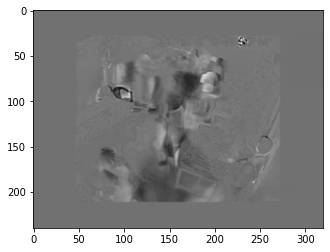

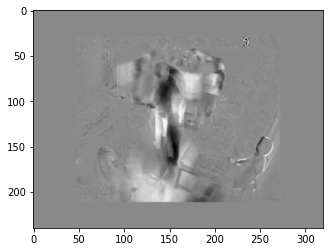

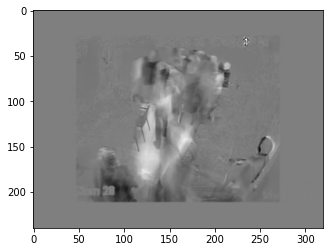

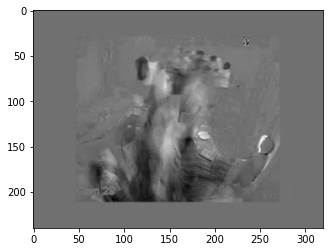

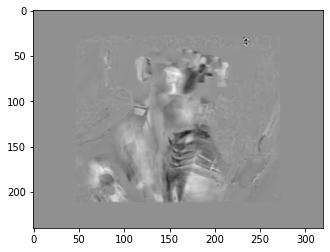

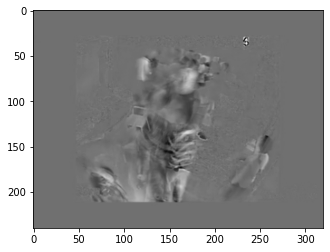

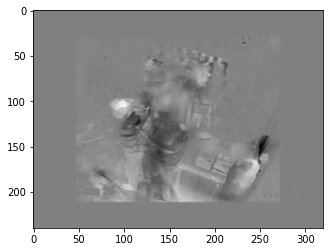

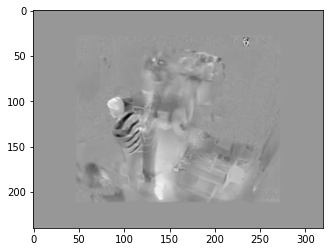

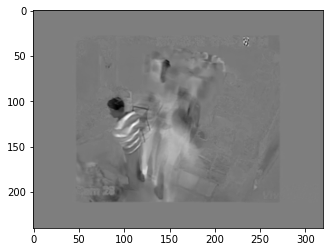

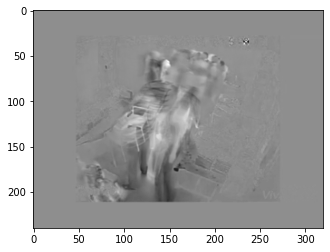

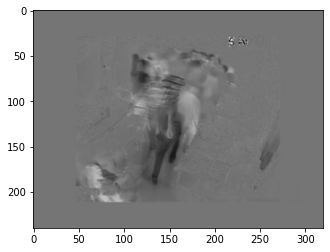

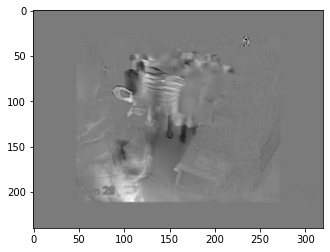

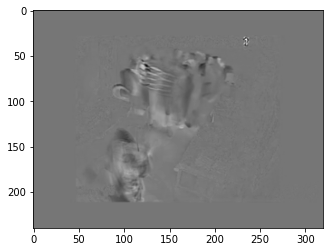

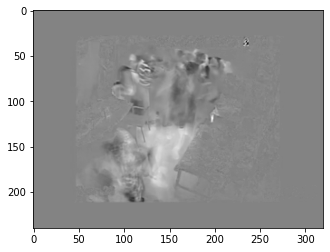

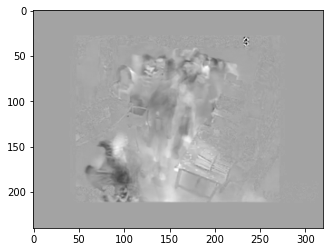

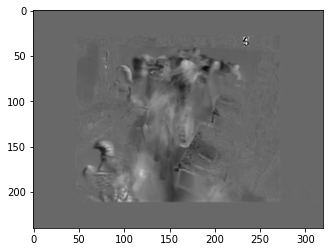

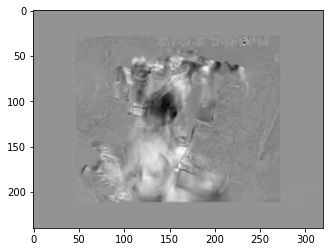

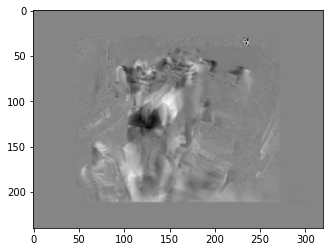

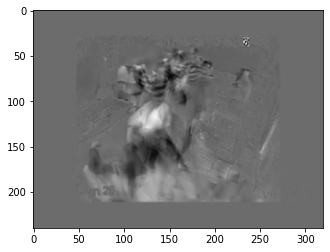

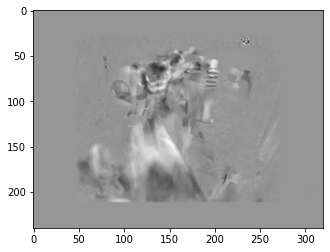

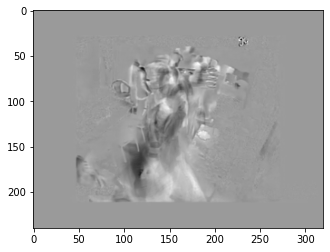

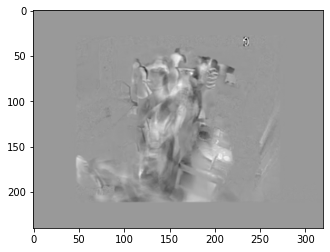

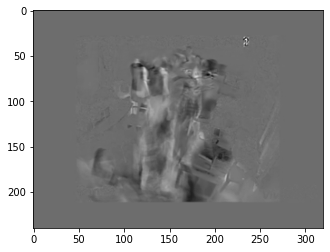

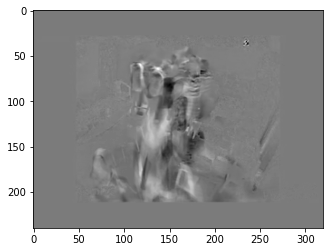

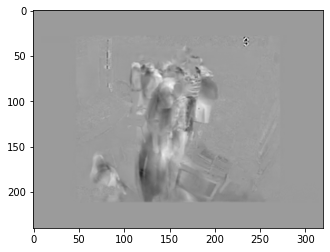

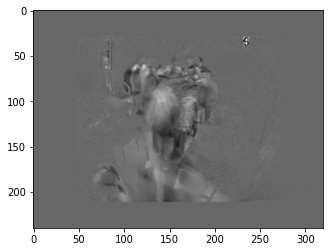

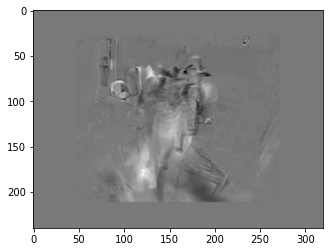

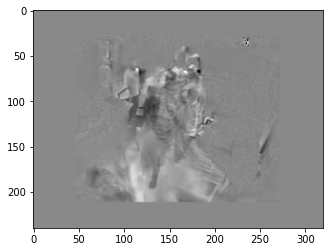

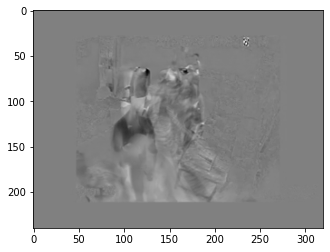

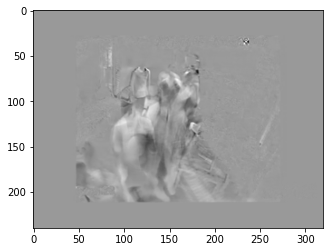

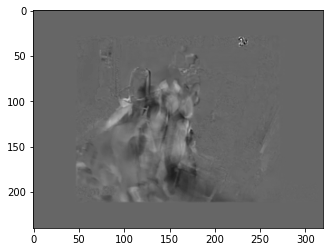

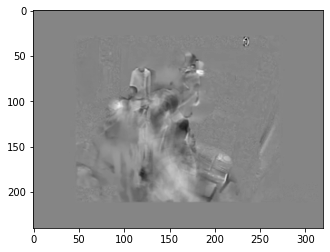

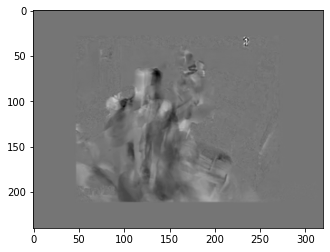

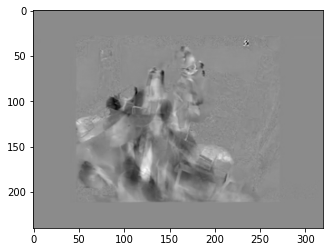

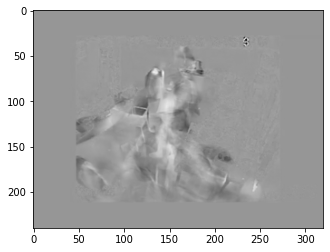

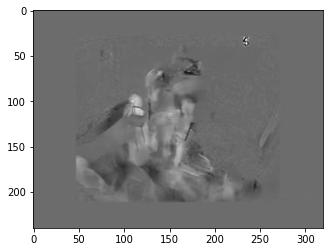

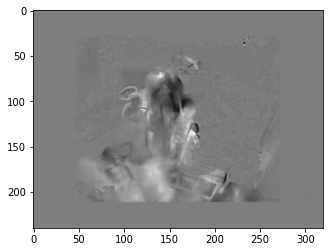

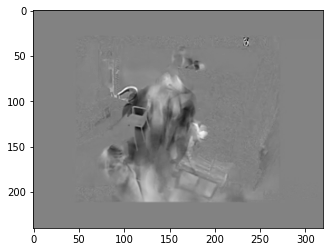

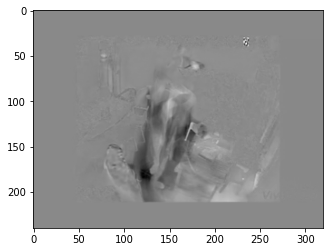

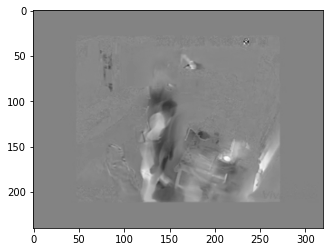

In [50]:
for item in new_differences_list:
    plt.imshow(item, cmap='gray')
    plt.show()

**Thresholding**

In [55]:
threshold = 1.5

significant_changes = []

for i in range(len(new_differences_list)):
    
    mean_difference = np.mean(new_differences_list[i])
    # print(mean_difference)
    
    if mean_difference > threshold:
        significant_changes.append(new_differences_list[i])
        
    

In [56]:
print(len(significant_changes))

13


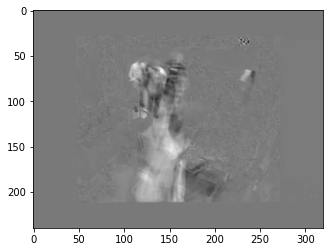

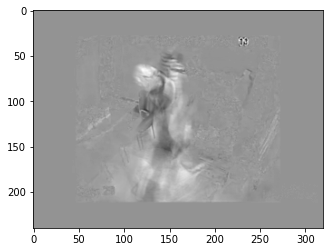

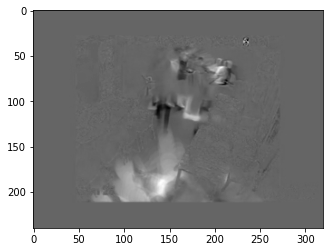

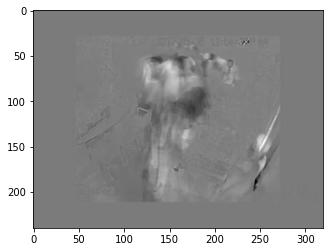

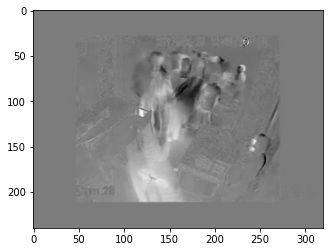

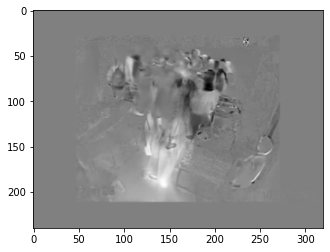

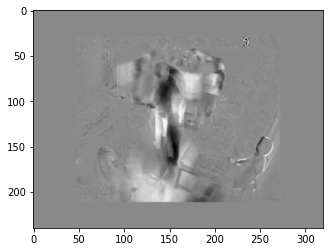

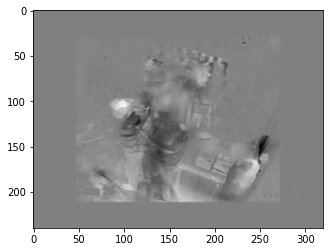

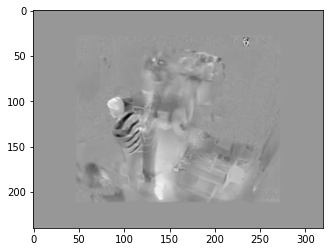

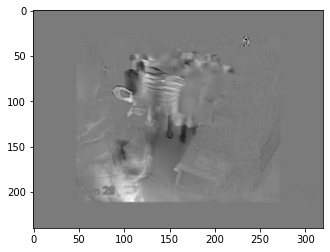

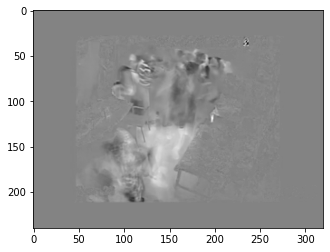

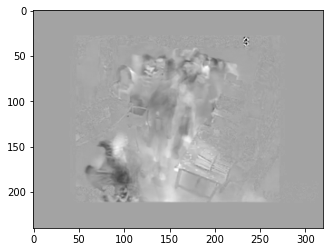

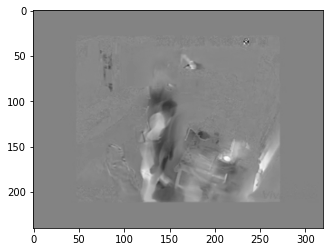

In [57]:
for item in significant_changes:
    plt.imshow(item, cmap='gray')
    plt.show()